# Memoria de trabajo

Este trabajo surge de la preocupacion naciente acerca de las oportunidades laborales con las que cuenta la ciudadania joven en el pais y como ciertos aspectos pueden influir a que se tenga mas o menos probabilidades de encontrar trabajo. Los datos fueron relativamente sencillos de encontrar, puesto que el INE (Instituto Nacional de Estadistica) cuenta con una gran cantidad de recursos dedicado a su recolecccion.

El primero de los datasets se obtuvo de https://www.ine.es/jaxiT3/Tabla.htm?t=4247

La tasa de desempleo, o paro, es un indicador clave que muestra el porcentaje de la fuerza laboral activa que está desempleada y busca empleo. Se calcula dividiendo el número de personas desempleadas por la población activa, multiplicando el resultado por 100 para obtener el porcentaje.

Para calcular el número de personas desempleadas, se consideran aquellas que están sin trabajo, disponibles para trabajar y buscando activamente empleo durante un período de referencia específico. Este número se divide por la población activa, que incluye tanto a las personas empleadas como a aquellas que están desempleadas pero buscando activamente trabajo.

La tasa de desempleo es un indicador clave para evaluar la salud de una economía y la eficacia de las políticas laborales. Un aumento en la tasa de desempleo puede indicar una desaceleración económica, mientras que una disminución puede sugerir un crecimiento económico o políticas laborales efectivas. Sin embargo, también hay limitaciones en su uso, ya que puede no reflejar completamente la subutilización del trabajo, como la desalineación de habilidades o la participación laboral desalentada.

### Preparacion de datos del EDA

##### En este Jupyter se prepararán los datasets que se usaran para realizar el estudio de las hipotesis relacionadas con el paro en España. Estos datasets recogen multiples datos sobre el paro y se irán explicando a medida que se vayan necesitando. El formato en el que se han obtenido ha sido CSV y vienen directamente de una descarga directa del INE (Instituto Nacional de Estadistica).

In [79]:
#Importar librerias
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.ticker as ticker
import geopandas as gpd
import folium

El primero de los archivos CSV recoge los datos de las tasas de paro diferenciando entre grupos de edad, sexo, comunidades autonomas y periodos.
Este CSV cuenta con varias columnas que vienen recogidas de la siguiente manera:
- Sexo: Sexo del grupo, pudiendo ser hombre, mujer o ambos sexos
- Comunidades y Ciudades Autónomas: Comunidad o ciudad autonoma a la que hace referencia, por lo que incluye a Ceuta, Melilla y las Islas Canarias de forma adicional.
- Edad: Rango de edad del grupo.
- Periodo: Año y trimestre del dato recogido.
- Total: Unidades del dato
- Total2: Decimales del dato

In [80]:
#Primera vista de los datasets que se usan
df_paro_edad_sexo_ca = pd.read_csv("./data/Tasas de paro por distintos grupos de edad, sexo y comunidad autónoma.csv")

Se comprueban los datos obtenidos y cuantos elementos no nulos se tienen en el archivo, como vienen las columnas y cuantos elementos no nulos tiene el archivo

In [81]:
df_paro_edad_sexo_ca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36960 entries, 0 to 36959
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Sexo                              36960 non-null  object 
 1   Comunidades y Ciudades Autónomas  36960 non-null  object 
 2   Edad                              36960 non-null  object 
 3   Periodo                           36960 non-null  object 
 4   Total                             36960 non-null  object 
 5   Total2                            36815 non-null  float64
dtypes: float64(1), object(5)
memory usage: 1.7+ MB


En este caso es exrtaño que Total tenga 36960 elementos no nulos y Total2 tenga 36815 elementos no nulos, teniendo en cuenta que unos son las unidades y otro los decimales. Por suerte, el archivo con los datos no es especialmente complejo sino mas bien largo, por lo que es relativamente sencillo encontrar de donde proviene este desajuste. Podria haber sido bien que algunas filas de datos no contaban con decimales y que por eso el desajuste entre unos y otros elementos, pero la realidad es que en la columna Total se rellena con dos puntos (..) cuando no se cuentan con los datos, y la columna Total2 en esas filas obtiene nulo.

In [82]:
#Una pequeña visualizacion de como son los datos
df_paro_edad_sexo_ca.head(100)

,Sexo,Comunidades y Ciudades Autónomas,Edad,Periodo,Total,Total2
0,Ambos sexos,Total Nacional,Total,2023T4,11,76.0
1,Ambos sexos,Total Nacional,Total,2023T3,11,84.0
2,Ambos sexos,Total Nacional,Total,2023T2,11,60.0
3,Ambos sexos,Total Nacional,Total,2023T1,13,26.0
4,Ambos sexos,Total Nacional,Total,2022T4,12,87.0
...,...,...,...,...,...,...
95,Ambos sexos,Total Nacional,Menores de 25 años,2022T1,30,18.0
96,Ambos sexos,Total Nacional,Menores de 25 años,2021T4,30,70.0
97,Ambos sexos,Total Nacional,Menores de 25 años,2021T3,31,15.0
98,Ambos sexos,Total Nacional,Menores de 25 años,2021T2,38,38.0


In [83]:
#En realidad los datasets estan bastante completos, asi que no hay mucho trabajo a la hora de limpiarlos
df_paro_edad_sexo_ca[df_paro_edad_sexo_ca['Total'].isnull()]


,Sexo,Comunidades y Ciudades Autónomas,Edad,Periodo,Total,Total2


Tras identificar esto en el dataset y como los dos puntos no nos aporta, se cambiarán los dos puntos en estas filas a nulos y ajustamos asi las filas con las que podemos contar y las filas con las que no.

In [84]:
#En una de las columnas en vez de blancos aparecen dos puntos, por lo que se debe cambiar a nulo
df_paro_edad_sexo_ca.Total.replace({"..":np.nan}, inplace=True)

In [85]:
df_paro_edad_sexo_ca[df_paro_edad_sexo_ca['Total'].isnull()]

,Sexo,Comunidades y Ciudades Autónomas,Edad,Periodo,Total,Total2
11377,Ambos sexos,Ceuta,De 16 a 19 años,2017T3,NaN,NaN
11384,Ambos sexos,Ceuta,De 16 a 19 años,2015T4,NaN,NaN
11972,Ambos sexos,Melilla,De 16 a 19 años,2022T4,NaN,NaN
11977,Ambos sexos,Melilla,De 16 a 19 años,2021T3,NaN,NaN
12006,Ambos sexos,Melilla,De 16 a 19 años,2014T2,NaN,NaN
...,...,...,...,...,...,...
36941,Mujeres,Melilla,55 y más años,2006T3,NaN,NaN
36942,Mujeres,Melilla,55 y más años,2006T2,NaN,NaN
36944,Mujeres,Melilla,55 y más años,2005T4,NaN,NaN
36945,Mujeres,Melilla,55 y más años,2005T3,NaN,NaN


Puesto que no se cuenta con los datos de determinados contextos en concreto y es muy improbable que estos datos no existan o sean realmente dificiles de conseguir (y componen menos del 0,01% del dataset) los eliminaremos. Esto hará que al realizar medias o realizar ciertos calculos con determinados datos no se enturbien los resultados por la influencia de nulos. Principalmente los estudios que se estan realizando son series temporales y que falte alguno de los tramos es menos problematico que el hecho de tener datos turbios, puesto que si faltan pueden inferirse en cierta medida.

In [86]:
df_paro_edad_sexo_ca.dropna(subset=['Total', 'Total2'], inplace=True)

Se juntan las dos columnas en una tercera, que recoge el dato concatenado para facilitar su manipulacion, y se llamará Total3 de forma que se pueda manejar el dato de momento

In [87]:
# Eliminar el .0 de la columna Total2
df_paro_edad_sexo_ca['Total2'] = df_paro_edad_sexo_ca['Total2'].astype(str).str.rstrip('.0')

# Convertir la columna Total2 a tipo objeto
df_paro_edad_sexo_ca['Total2'] = df_paro_edad_sexo_ca['Total2'].astype(object)
df_paro_edad_sexo_ca['Total3'] = df_paro_edad_sexo_ca['Total'].astype(str) + '.' + df_paro_edad_sexo_ca['Total2'].astype(str)
df_paro_edad_sexo_ca['Total3'] = df_paro_edad_sexo_ca['Total3'].astype(object)

In [88]:
df_paro_edad_sexo_ca.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36815 entries, 0 to 36959
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Sexo                              36815 non-null  object
 1   Comunidades y Ciudades Autónomas  36815 non-null  object
 2   Edad                              36815 non-null  object
 3   Periodo                           36815 non-null  object
 4   Total                             36815 non-null  object
 5   Total2                            36815 non-null  object
 6   Total3                            36815 non-null  object
dtypes: object(7)
memory usage: 2.2+ MB


Se guarda todo el dataset en un nuevo csv para poder manipular y dejar los datos tratados en un nuevo archivo, que se usará para realizar el analisis y la resolucion de hipotesis del EDA.

In [89]:
df_paro_edad_sexo_ca.to_csv("./data/Tasas de paro por distintos grupos de edad, sexo y comunidad autónoma limpios y organizados.csv")

# Primera hipotesis

## ¿Tienen las personas jovenes o parecen tener oportunidades para integrarse al mercado laboral, o la han tenido durante los ultimos 20 años?


Cargamos los datos del csv que se ha creado con los datos ya tratados y listos para ser analizados.

In [90]:
df_paro_edad_sexo_ca = pd.read_csv("./data/Tasas de paro por distintos grupos de edad, sexo y comunidad autónoma limpios y organizados.csv")

En primera instancia y para ir adquiriendo contexto, es conveniente ver de forma grafica como ha ido evolucionando la tasa de paro a nivel nacional a lo largo de los años, haciendo uso de los datos que se han obtenido. Se incluyen todos los grupos en esta representacion, puesto que la comparacion y analisis de esto se hará mas adelante.

In [91]:
df_query = df_paro_edad_sexo_ca.query('`Sexo` == "Ambos sexos" & `Comunidades y Ciudades Autónomas` == "Total Nacional" & `Edad` == "Total"')
df_query = df_query.sort_values(by='Periodo', ascending=True)
pd.set_option('display.max_rows', df_query.shape[0]+1)
df_query

,Unnamed: 0,Sexo,Comunidades y Ciudades Autónomas,Edad,Periodo,Total,Total2,Total3
87,87,Ambos sexos,Total Nacional,Total,2002T1,11,55.0,11.55
86,86,Ambos sexos,Total Nacional,Total,2002T2,11,15.0,11.15
85,85,Ambos sexos,Total Nacional,Total,2002T3,11,49.0,11.49
84,84,Ambos sexos,Total Nacional,Total,2002T4,11,61.0,11.61
83,83,Ambos sexos,Total Nacional,Total,2003T1,11,99.0,11.99
82,82,Ambos sexos,Total Nacional,Total,2003T2,11,28.0,11.28
81,81,Ambos sexos,Total Nacional,Total,2003T3,11,3.0,11.30
80,80,Ambos sexos,Total Nacional,Total,2003T4,11,37.0,11.37
79,79,Ambos sexos,Total Nacional,Total,2004T1,11,5.0,11.50
78,78,Ambos sexos,Total Nacional,Total,2004T2,11,9.0,11.90


c:\Users\unais\anaconda3\envs\DataScience\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


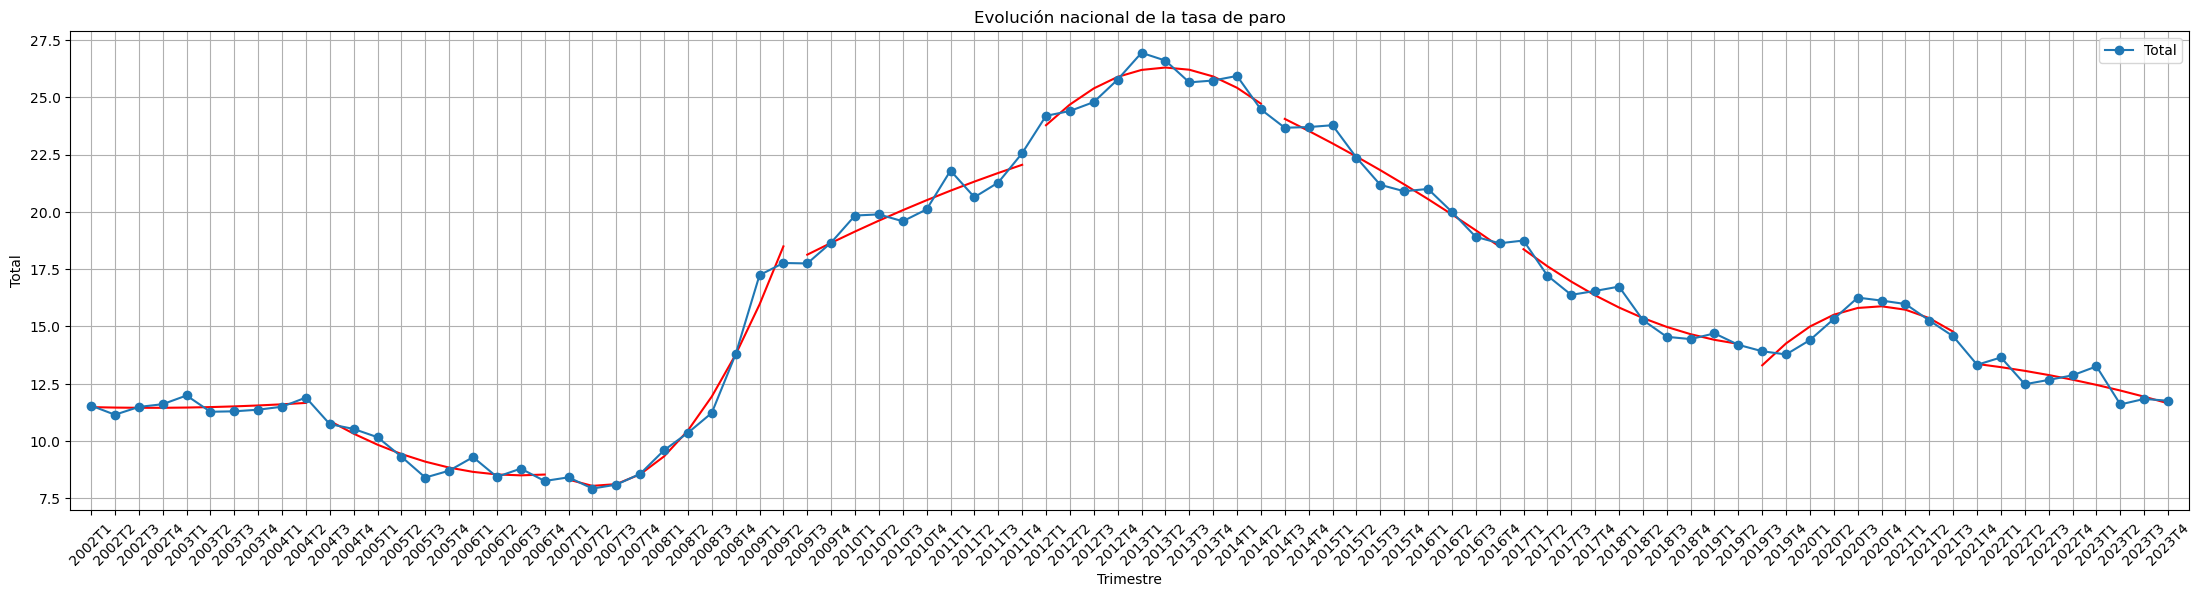

In [92]:
tramos = np.array_split(df_query, 9)  # Dividir los datos en tramos

# Crear el gráfico
plt.figure(figsize=(22, 6))  
plt.xlabel('Trimestre')  
plt.ylabel('Total')  
plt.title('Evolución nacional de la tasa de paro')  
plt.xticks(rotation=45)  
plt.grid(True)  
plt.margins(x=0.01)
plt.tight_layout()  

# Iterar sobre cada tramo
for tramo in tramos:
    # Calcular y trazar la línea de tendencia para cada tramo
    z = np.polyfit(tramo.index, tramo['Total3'], 2)  # Ajuste polinómico de grado 2
    p = np.poly1d(z)
    plt.plot(tramo['Periodo'], p(tramo.index), color='red')

# Agregar los puntos originales al gráfico
plt.plot(df_query['Periodo'], df_query['Total3'], marker='o', label='Total')  # Crear la línea del gráfico

plt.legend()
plt.show()

Como se puede apreciar en la figura resultante, la tasa de desempleo en España revela fluctuaciones que están influenciadas por varios factores económicos y contextuales. Las subidas suelen corresponder a momentos de crisis económica, como la recesión global de 2008, donde el desempleo aumenta debido al cierre de empresas y la disminución de la demanda laboral. La tasa de paro nacional llegó a porcentjes de casi 27% en el ultimo trimestre de 2012. 

Las bajadas, por otro lado, se relacionan con periodos de recuperación económica, como la implementación de políticas de estímulo al empleo o mejoras en las condiciones económicas generales. Además, factores estacionales y eventos externos, como la pandemia de COVID-19, también afectan estas fluctuaciones. En resumen, las subidas y bajadas en la tasa de desempleo reflejan los ciclos económicos y las condiciones del mercado laboral a lo largo del tiempo.
La tasa mínima registrada fue el primer trimestre de 2007.

Podría decirse que durante los ultimos 20 años la tasa de paro no ha sido precisamente estable pero que ha mostrado ciertas tendencias

c:\Users\unais\anaconda3\envs\DataScience\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


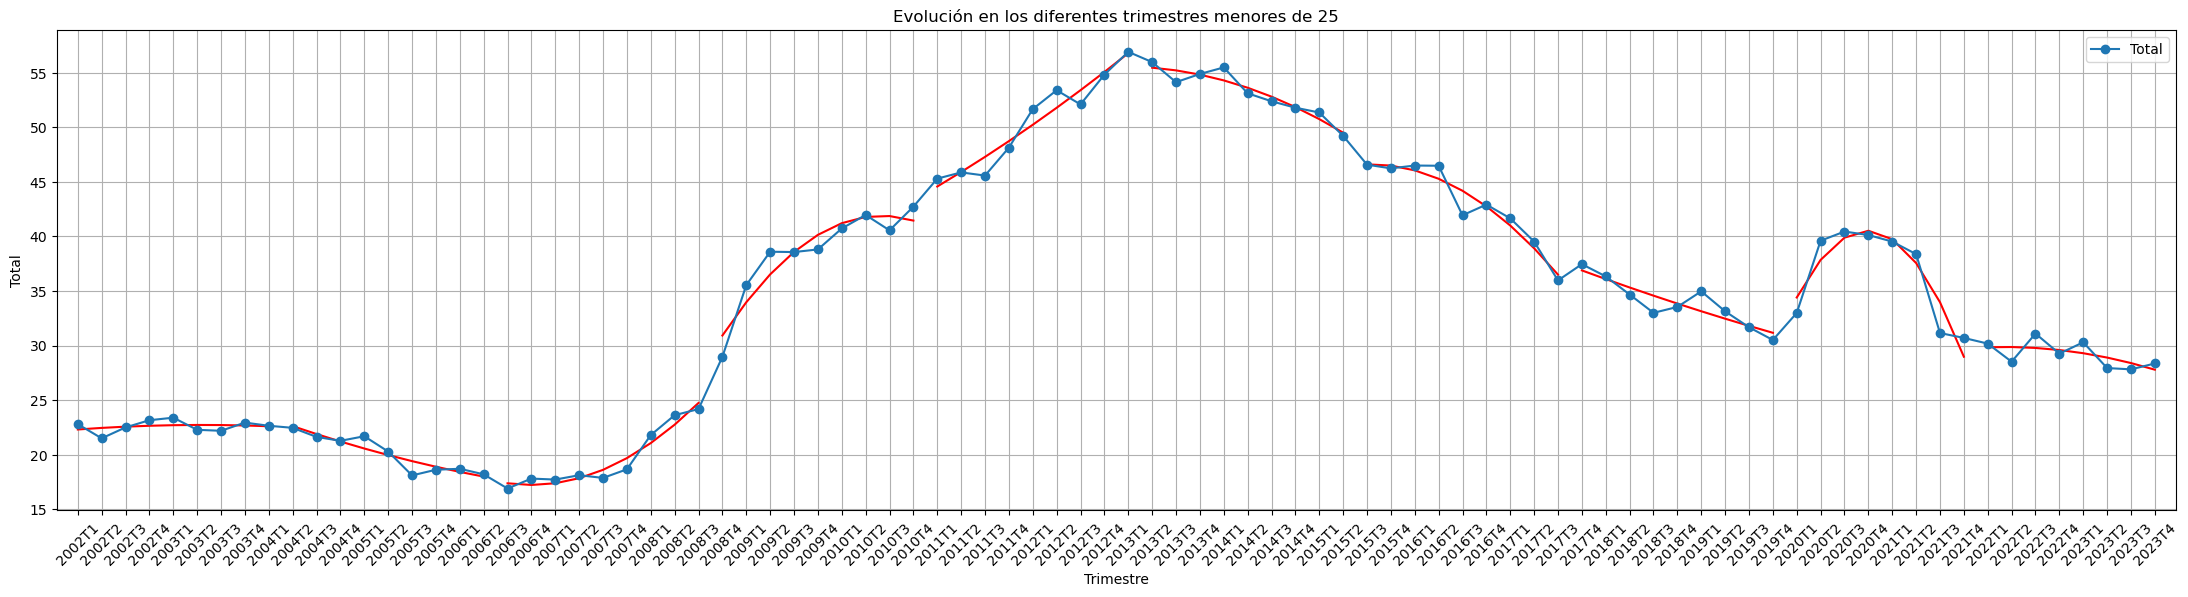

In [93]:
#Ahora para los jovenes
df_query_jovenes = df_paro_edad_sexo_ca.query('`Sexo` == "Ambos sexos" & `Comunidades y Ciudades Autónomas` == "Total Nacional" & `Edad` == "Menores de 25 años"')
df_query_jovenes = df_query_jovenes.sort_values(by='Periodo', ascending=True)
plt.figure(figsize=(22, 6))  # Tamaño del gráfico
plt.xlabel('Trimestre')  # Etiqueta del eje X
plt.ylabel('Total')  # Etiqueta del eje Y
plt.title('Evolución en los diferentes trimestres menores de 25')  # Título del gráfico
plt.xticks(rotation=45)  # Rotar etiquetas del eje X para mejor visualización
plt.grid(True)  # Mostrar cuadrícula
plt.margins(x=0.01)
plt.tight_layout()  # Ajustar diseño

tramos_jovenes = np.array_split(df_query_jovenes, 10)  # Dividir los datos en tramos

# Iterar sobre cada tramo
for tramo in tramos_jovenes:
    # Calcular y trazar la línea de tendencia para cada tramo
    z = np.polyfit(tramo.index, tramo['Total3'], 2)  # Ajuste polinómico de grado 2
    p = np.poly1d(z)
    plt.plot(tramo['Periodo'], p(tramo.index), color='red')  # Especificar el color rojo

# Agregar los puntos originales al gráfico
plt.plot(df_query_jovenes['Periodo'], df_query_jovenes['Total3'], marker='o', label='Total')  # Crear la línea del gráfico

plt.legend()
plt.show()  # Mostrar gráfico


Al analizar la evolución de la tasa de desempleo específicamente para el grupo de personas menores de 25 años en España, se hace evidente que enfrentan mayores desafíos en el mercado laboral en comparación con la tasa nacional media. Este grupo demográfico tiende a experimentar tasas de desempleo más altas, lo que indica una mayor vulnerabilidad y dificultades para acceder al empleo.

La aplicación de un enfoque por tramos para trazar las líneas de tendencia nos permite visualizar con mayor claridad estas disparidades. A través de este análisis, se pueden identificar patrones más detallados en el comportamiento de la tasa de desempleo entre los jóvenes menores de 25 años. La fluctuación más pronunciada en su tasa de desempleo refleja su entrada y salida frecuente del mercado laboral, así como su mayor susceptibilidad durante períodos económicos desafiantes.

Al comparar estas tendencias con la tasa nacional media, queda claro que los jóvenes menores de 25 años enfrentan tasas de desempleo consistentemente más altas. Este hallazgo subraya la necesidad de políticas y programas específicamente dirigidos a este grupo demográfico para abordar sus necesidades únicas en el mercado laboral y promover oportunidades de empleo más equitativas.

c:\Users\unais\anaconda3\envs\DataScience\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


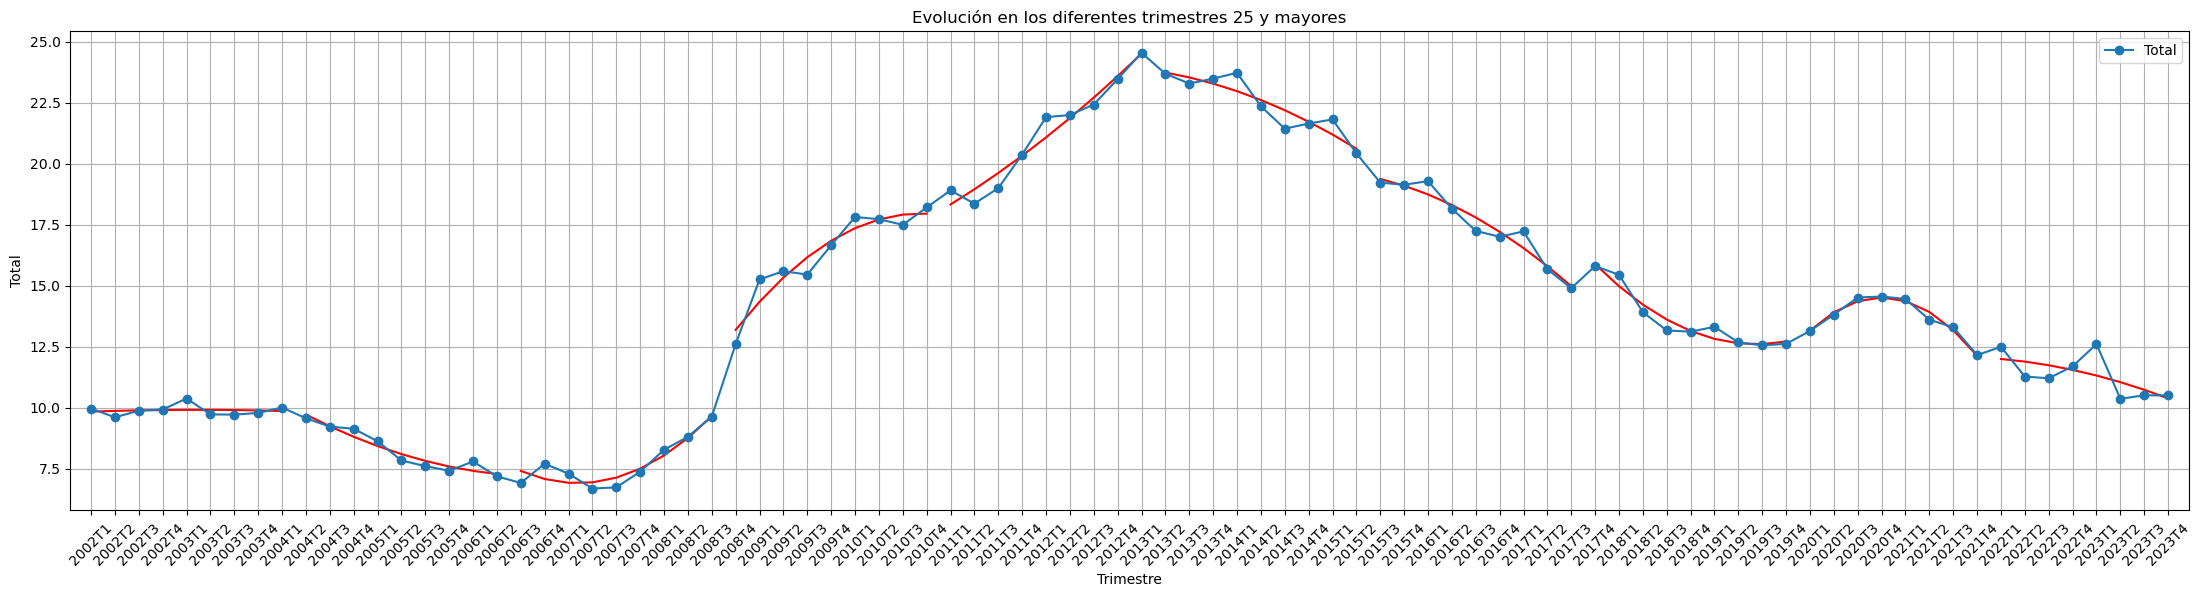

In [94]:
#Ahora los no tan jovenes
df_query_mayores = df_paro_edad_sexo_ca.query('`Sexo` == "Ambos sexos" & `Comunidades y Ciudades Autónomas` == "Total Nacional" & `Edad` == "25 y más años"')
df_query_mayores = df_query_mayores.sort_values(by='Periodo', ascending=True)

plt.figure(figsize=(22, 6))  # Tamaño del gráfico
plt.xlabel('Trimestre')  # Etiqueta del eje X
plt.ylabel('Total')  # Etiqueta del eje Y
plt.title('Evolución en los diferentes trimestres 25 y mayores')  # Título del gráfico
plt.xticks(rotation=45)  # Rotar etiquetas del eje X para mejor visualización
plt.grid(True)  # Mostrar cuadrícula
plt.margins(x=0.01)
plt.tight_layout()  # Ajustar diseño

tramos_mayores = np.array_split(df_query_mayores, 10)  # Dividir los datos en tramos

# Iterar sobre cada tramo
for tramo in tramos_mayores:
    # Calcular y trazar la línea de tendencia para cada tramo
    z = np.polyfit(tramo.index, tramo['Total3'], 2)  # Ajuste polinómico de grado 2
    p = np.poly1d(z)
    plt.plot(tramo['Periodo'], p(tramo.index), color='red')  # Especificar el color rojo

# Agregar los puntos originales al gráfico
plt.plot(df_query_mayores['Periodo'], df_query_mayores['Total3'], marker='o', label='Total')  # Crear la línea del gráfico

plt.legend()
plt.show()  # Mostrar gráfico

Al examinar la evolución de la tasa de desempleo para el grupo de personas mayores de 25 años en España, se observa que su situación en el mercado laboral es relativamente más estable en comparación con la tasa nacional media. Este grupo demográfico tiende a registrar una tasa de desempleo que, si bien puede ser ligeramente inferior a la media nacional, se mantiene en niveles comparables.

El análisis por tramos y la aplicación de líneas de tendencia nos permiten visualizar cómo la tasa de desempleo entre los mayores de 25 años se comporta a lo largo del tiempo. Si bien pueden existir variaciones estacionales o relacionadas con ciclos económicos, en general, esta cohorte experimenta una relativa estabilidad en comparación con los jóvenes menores de 25 años.

Al contrastar estas tendencias con la tasa nacional media, se observa que los mayores de 25 años tienen una situación laboral más estable, con una tasa de desempleo que se mantiene en niveles cercanos a la media nacional. 

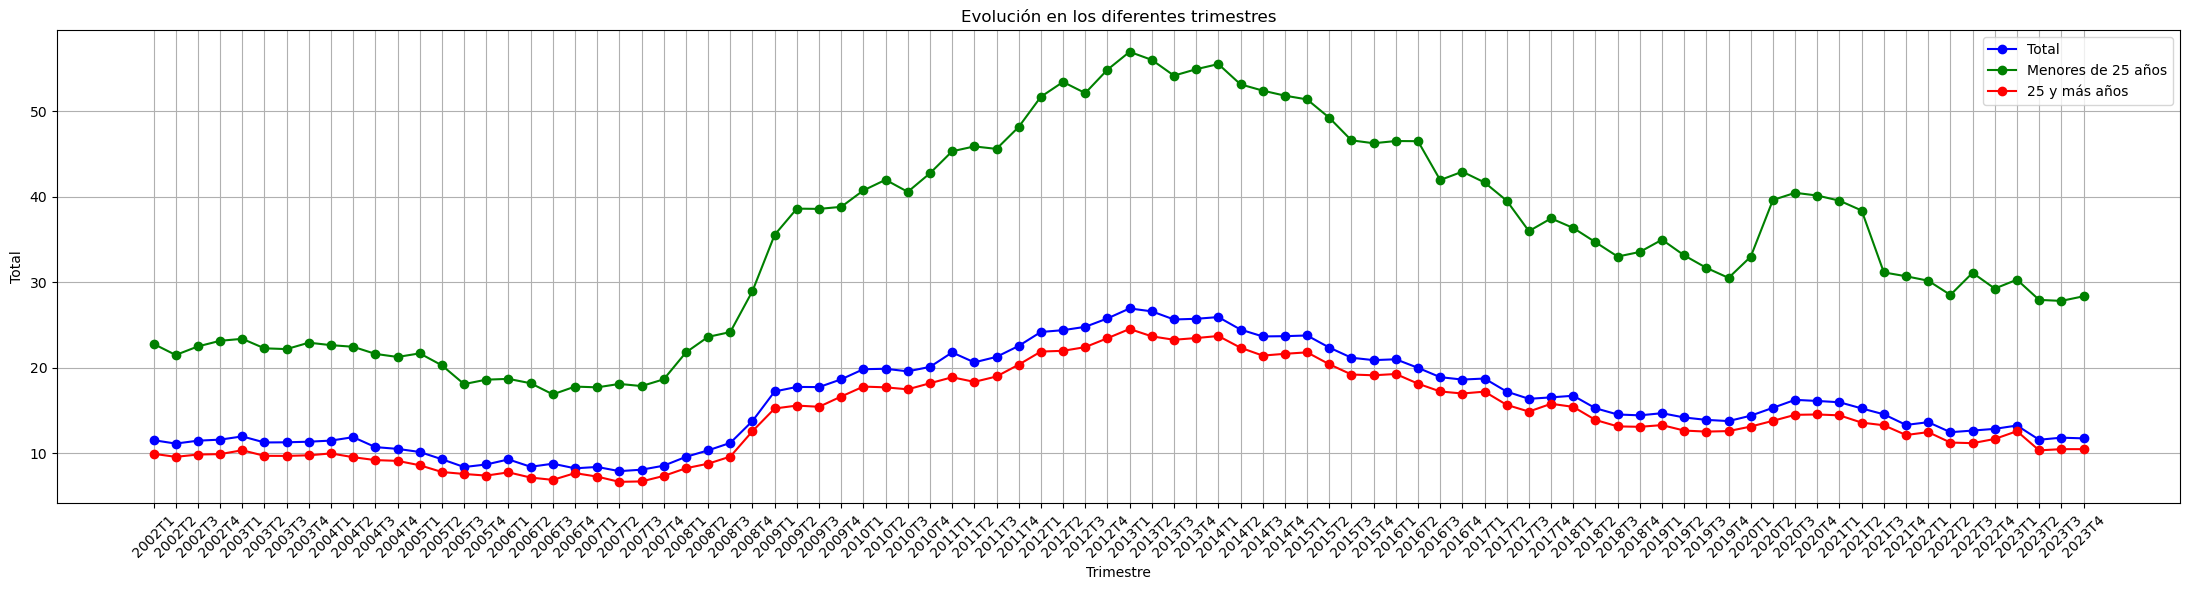

In [95]:
plt.figure(figsize=(22, 6))  # Tamaño del gráfico

# Gráfico para 'Total'
plt.plot(df_query['Periodo'], df_query['Total3'], marker='o', label='Total', color='blue')

# Gráfico para 'Menores de 25 años'
plt.plot(df_query_jovenes['Periodo'], df_query_jovenes['Total3'], marker='o', label='Menores de 25 años', color='green')

# Gráfico para '25 y más años'
plt.plot(df_query_mayores['Periodo'], df_query_mayores['Total3'], marker='o', label='25 y más años', color='red')

plt.xlabel('Trimestre')  # Etiqueta del eje X
plt.ylabel('Total')  # Etiqueta del eje Y
plt.title('Evolución en los diferentes trimestres')  # Título del gráfico
plt.xticks(rotation=45)  # Rotar etiquetas del eje X para mejor visualización
plt.legend()  # Mostrar leyenda
plt.grid(True)  # Mostrar cuadrícula
plt.tight_layout()  # Ajustar diseño
plt.show()  # Mostrar gráfico


Al observar la representación conjunta de las tasas de desempleo para los diferentes grupos demográficos (menores de 25 años, mayores de 25 años y la tasa nacional media) en una única gráfica, podemos identificar claramente las disparidades en el mercado laboral español.

En primer lugar, la línea correspondiente a los menores de 25 años exhibe una mayor variabilidad y tasas de desempleo consistentemente más altas a lo largo del tiempo. Esto refleja las dificultades adicionales que enfrenta este grupo demográfico para acceder al empleo, así como su mayor vulnerabilidad durante períodos económicos adversos.

Por otro lado, la línea correspondiente a los mayores de 25 años muestra una estabilidad relativa, con tasas de desempleo que se mantienen en niveles cercanos a la media nacional. Esto sugiere que este grupo demográfico experimenta menos dificultades para encontrar empleo en comparación con los jóvenes.

Finalmente, la línea que representa la tasa nacional media se sitúa entre las tasas de desempleo de los dos grupos demográficos, indicando que la situación general del mercado laboral español está influenciada por las experiencias de ambos grupos.

En conjunto, este análisis resalta la importancia de abordar las necesidades específicas de cada grupo demográfico en las políticas laborales y económicas, con el objetivo de promover oportunidades de empleo más equitativas y reducir las disparidades en el mercado laboral.

## Conclusiones de la hipotesis planteada

Las personas jóvenes, especialmente aquellas menores de 25 años, parecen enfrentar mayores dificultades para integrarse al mercado laboral en comparación con los mayores de 25 años durante los últimos 20 años. Esto se evidencia en tasas de desempleo consistentemente más altas y una mayor variabilidad en su tasa de desempleo a lo largo del tiempo. Por lo tanto, la hipótesis de que las personas jóvenes tienen menos oportunidades para integrarse al mercado laboral parece estar respaldada por los datos analizados.

### Planteando la segunda hipotesis a raiz de la primera

Aprovechando que contamos con estos datos, podemos hilar con la siguiente hipotesis, que plantea la idea de que hace años existía una clara brecha en cuanto a la cantidad de hombres empleados frente a mujeres empleadas. La hipotesis plantea cual ha sido su evolucion en estos ultimos años tambien, y en que punto se encuentra actualmente tanto a nivel nacional como, para aprovechar el trabajo anterior, a nivel de grupo de personas jovenes.

Lo primero que se observará será para los hombres de cualquier edad a nivel nacional

c:\Users\unais\anaconda3\envs\DataScience\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


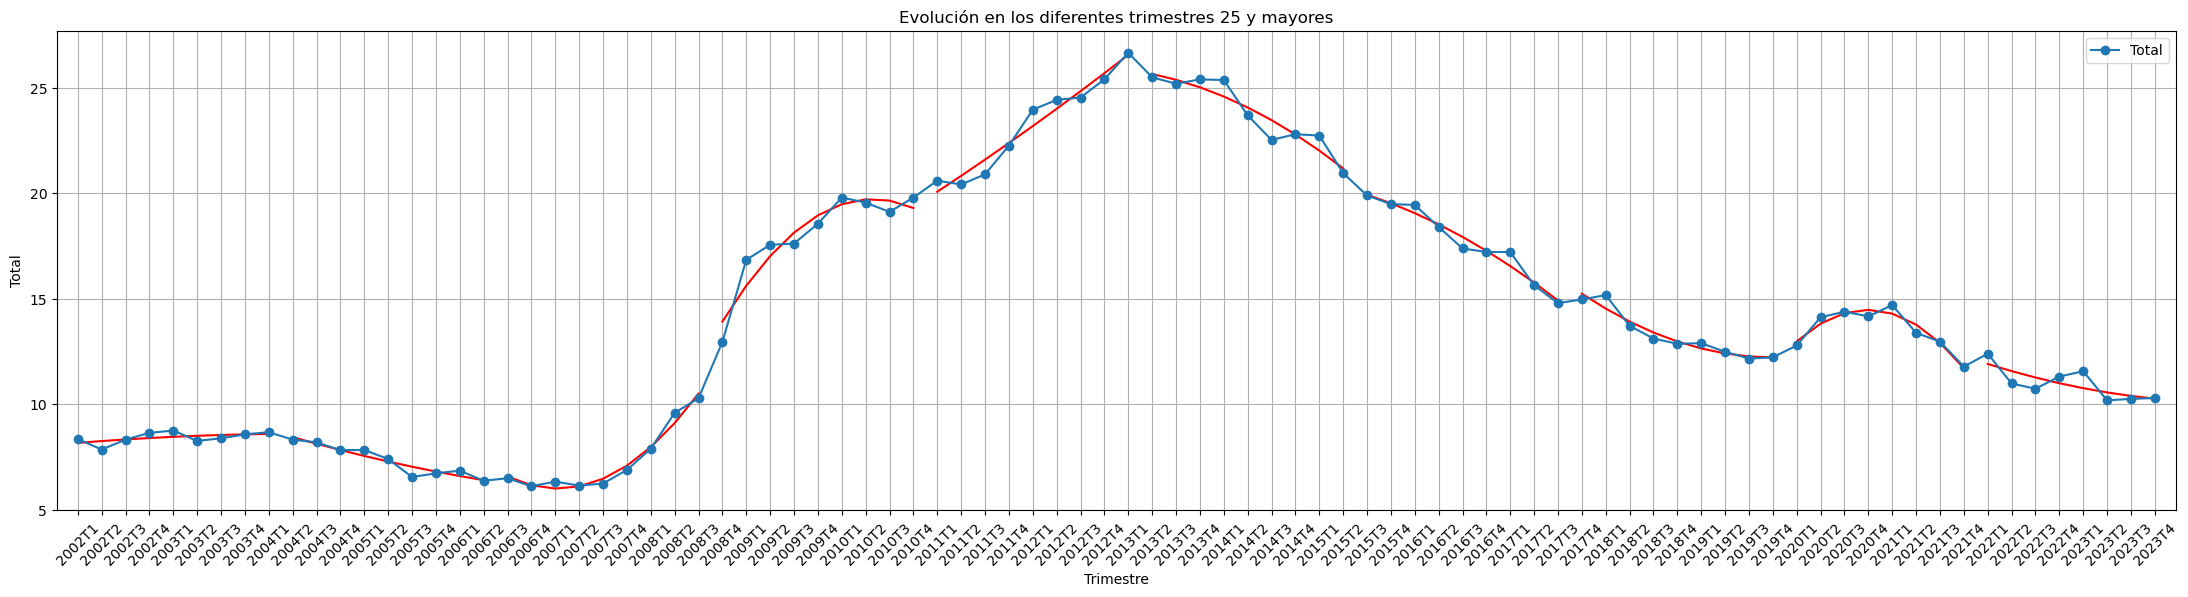

In [96]:
df_query_hombres = df_paro_edad_sexo_ca.query('`Sexo` == "Hombres" & `Comunidades y Ciudades Autónomas` == "Total Nacional" & `Edad` == "Total"')
df_query_hombres = df_query_hombres.sort_values(by='Periodo', ascending=True)

plt.figure(figsize=(22, 6))  # Tamaño del gráfico
plt.xlabel('Trimestre')  # Etiqueta del eje X
plt.ylabel('Total')  # Etiqueta del eje Y
plt.title('Evolución en los diferentes trimestres para los hombres')  # Título del gráfico
plt.xticks(rotation=45)  # Rotar etiquetas del eje X para mejor visualización
plt.grid(True)  # Mostrar cuadrícula
plt.margins(x=0.01)
plt.tight_layout()  # Ajustar diseño

tramos_hombres = np.array_split(df_query_hombres, 10)  # Dividir los datos en tramos

# Iterar sobre cada tramo
for tramo in tramos_hombres:
    # Calcular y trazar la línea de tendencia para cada tramo
    z = np.polyfit(tramo.index, tramo['Total3'], 2)  # Ajuste polinómico de grado 2
    p = np.poly1d(z)
    plt.plot(tramo['Periodo'], p(tramo.index), color='red')  # Especificar el color rojo

# Agregar los puntos originales al gráfico
plt.plot(df_query_hombres['Periodo'], df_query_hombres['Total3'], marker='o', label='Total')  # Crear la línea del gráfico

plt.legend()
plt.show()  # Mostrar gráfico

Teniendo el grafico de los hombres, pasamos a realizar el de las mujeres a nivel nacional tambien.

c:\Users\unais\anaconda3\envs\DataScience\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


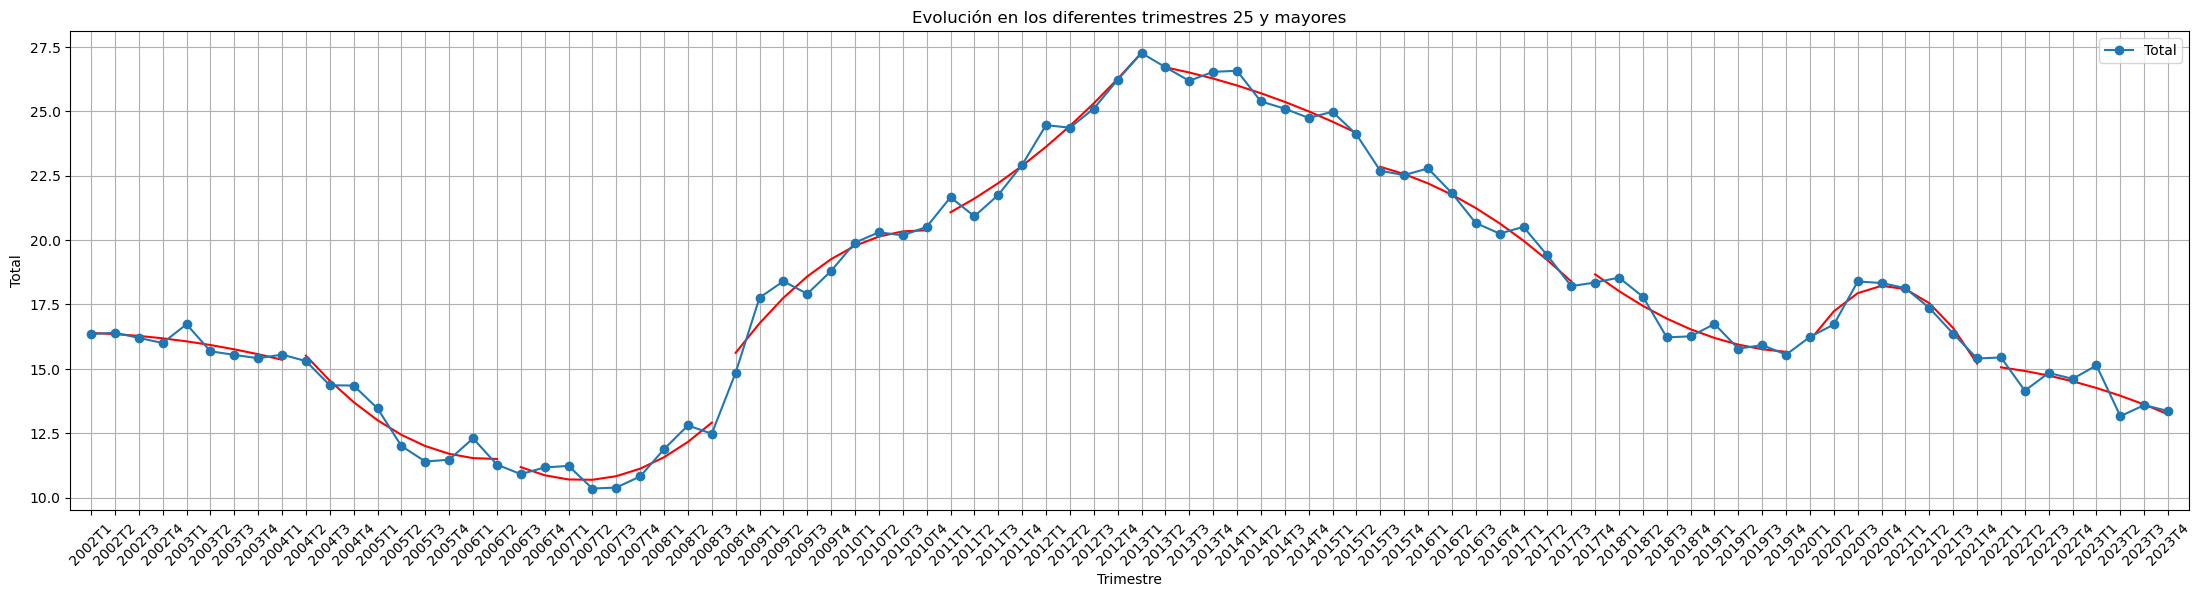

In [97]:
df_query_mujeres = df_paro_edad_sexo_ca.query('`Sexo` == "Mujeres" & `Comunidades y Ciudades Autónomas` == "Total Nacional" & `Edad` == "Total"')
df_query_mujeres = df_query_mujeres.sort_values(by='Periodo', ascending=True)

plt.figure(figsize=(22, 6))  # Tamaño del gráfico
plt.xlabel('Trimestre')  # Etiqueta del eje X
plt.ylabel('Total')  # Etiqueta del eje Y
plt.title('Evolución en los diferentes trimestres 25 y mayores')  # Título del gráfico
plt.xticks(rotation=45)  # Rotar etiquetas del eje X para mejor visualización
plt.grid(True)  # Mostrar cuadrícula
plt.margins(x=0.01)
plt.tight_layout()  # Ajustar diseño

tramos_mujeres = np.array_split(df_query_mujeres, 10)  # Dividir los datos en tramos

# Iterar sobre cada tramo
for tramo in tramos_mujeres:
    # Calcular y trazar la línea de tendencia para cada tramo
    z = np.polyfit(tramo.index, tramo['Total3'], 2)  # Ajuste polinómico de grado 2
    p = np.poly1d(z)
    plt.plot(tramo['Periodo'], p(tramo.index), color='red')  # Especificar el color rojo

# Agregar los puntos originales al gráfico
plt.plot(df_query_mujeres['Periodo'], df_query_mujeres['Total3'], marker='o', label='Total')  # Crear la línea del gráfico

plt.legend()
plt.show()  # Mostrar gráfico

Para realizar la comparacion entre ambas podemos aunarlas en un mismo grafico y realizar un analisis bajo un mismo medidos, que puede ser la media nacional para ambos sexos

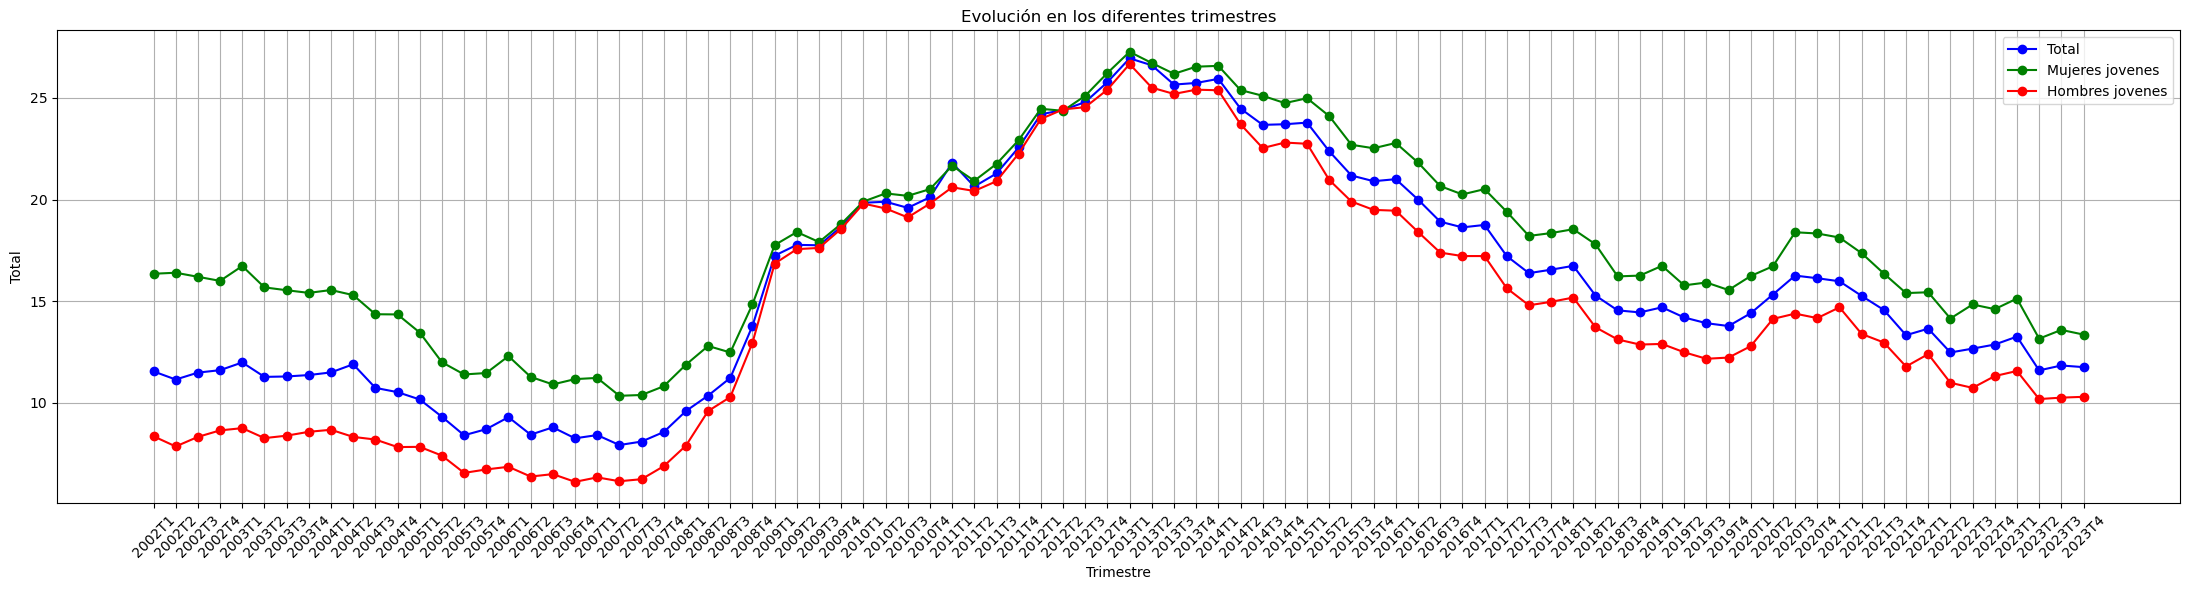

In [98]:
plt.figure(figsize=(22, 6))  # Tamaño del gráfico

# Gráfico para 'Total'
plt.plot(df_query['Periodo'], df_query['Total3'], marker='o', label='Total', color='blue')

# Gráfico para 'Menores de 25 años'
plt.plot(df_query_mujeres['Periodo'], df_query_mujeres['Total3'], marker='o', label='Mujeres jovenes', color='green')

# Gráfico para '25 y más años'
plt.plot(df_query_hombres['Periodo'], df_query_hombres['Total3'], marker='o', label='Hombres jovenes', color='red')

plt.xlabel('Trimestre')  # Etiqueta del eje X
plt.ylabel('Total')  # Etiqueta del eje Y
plt.title('Evolución en los diferentes trimestres')  # Título del gráfico
plt.xticks(rotation=45)  # Rotar etiquetas del eje X para mejor visualización
plt.legend()  # Mostrar leyenda
plt.grid(True)  # Mostrar cuadrícula
plt.tight_layout()  # Ajustar diseño
plt.show()  # Mostrar gráfico

Puede verse que a media que avanzaba el tiempo (desde 2002 hasta 2008 aproximadamente) esta diferencia iba reduciendose pero con unos pasos realmente poco notorios. La situacion parece que se volvió insostenible apra ambos grupos a raiz de la crisis economica, la cual aumentó el paro para ambos grupos y los situó en tasas muy similares.

El problema parece venir despues, cuando se nota la recuperacion tras la crisis,que esta diferencia entre ambas clases se va incrementando y que en cierta manera se estabiliza tras alcanzar una diferencia cercana al 5% entre ambas, de forma aproximada (aumentando o disminuyendo en ciertos tramos).

Ahora realizaremos el mismo proceso para los hombres y mujeres jovenes.

c:\Users\unais\anaconda3\envs\DataScience\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


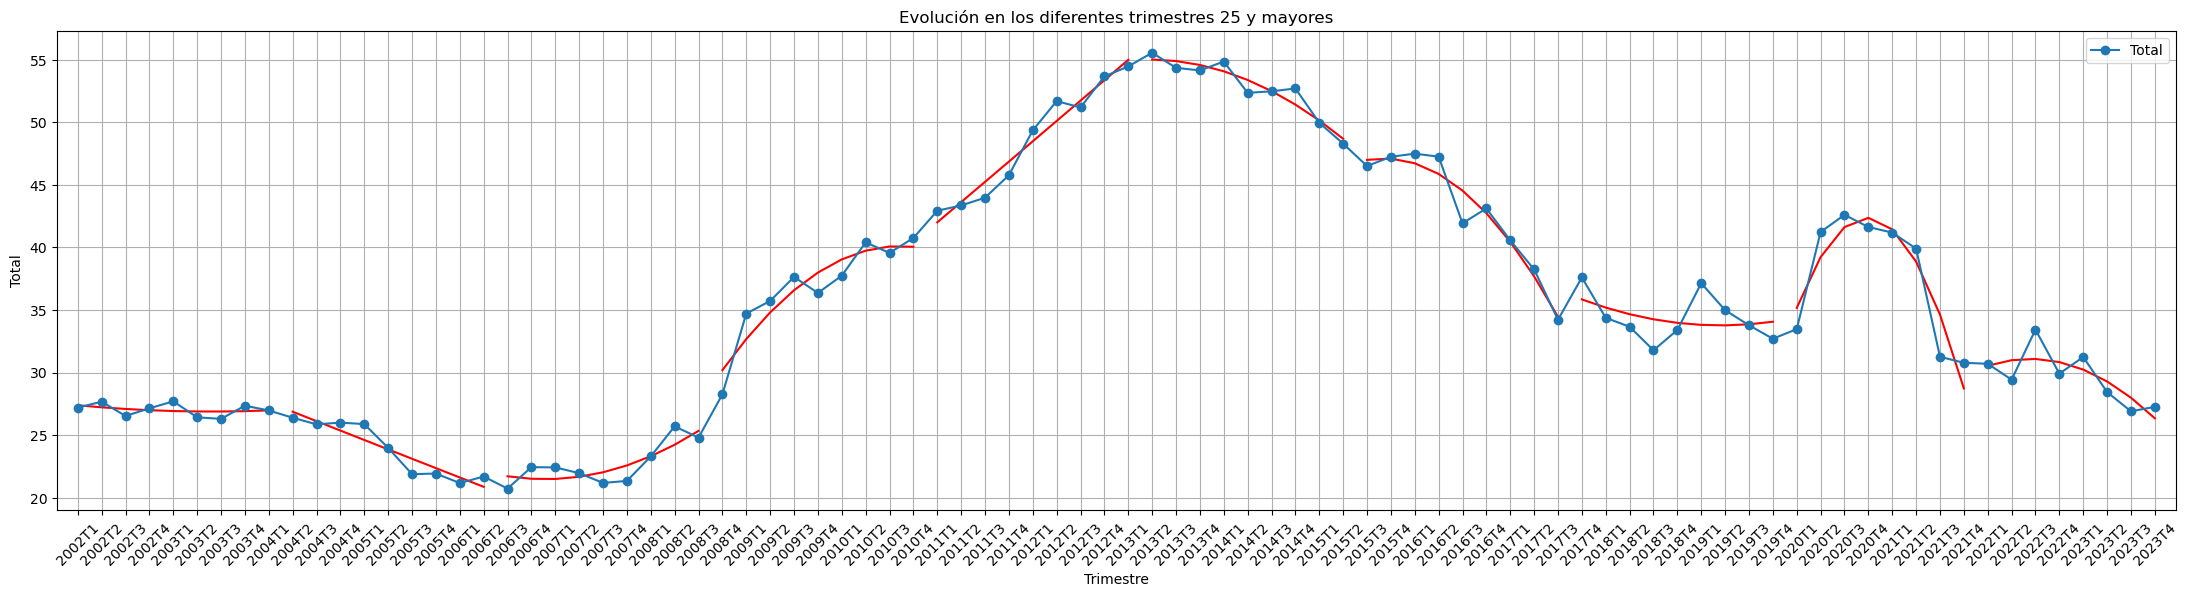

In [99]:
df_query_mujeres_jovenes = df_paro_edad_sexo_ca.query('`Sexo` == "Mujeres" & `Comunidades y Ciudades Autónomas` == "Total Nacional" & `Edad` == "Menores de 25 años"')
df_query_mujeres_jovenes = df_query_mujeres_jovenes.sort_values(by='Periodo', ascending=True)

plt.figure(figsize=(22, 6))  # Tamaño del gráfico
plt.xlabel('Trimestre')  # Etiqueta del eje X
plt.ylabel('Total')  # Etiqueta del eje Y
plt.title('Evolución en los diferentes trimestres 25 y mayores')  # Título del gráfico
plt.xticks(rotation=45)  # Rotar etiquetas del eje X para mejor visualización
plt.grid(True)  # Mostrar cuadrícula
plt.margins(x=0.01)
plt.tight_layout()  # Ajustar diseño

tramos_mujeres_jovenes = np.array_split(df_query_mujeres_jovenes, 10)  # Dividir los datos en tramos

# Iterar sobre cada tramo
for tramo in tramos_mujeres_jovenes:
    # Calcular y trazar la línea de tendencia para cada tramo
    z = np.polyfit(tramo.index, tramo['Total3'], 2)  # Ajuste polinómico de grado 2
    p = np.poly1d(z)
    plt.plot(tramo['Periodo'], p(tramo.index), color='red')  # Especificar el color rojo

# Agregar los puntos originales al gráfico
plt.plot(df_query_mujeres_jovenes['Periodo'], df_query_mujeres_jovenes['Total3'], marker='o', label='Total')  # Crear la línea del gráfico

plt.legend()
plt.show()  # Mostrar gráfico

c:\Users\unais\anaconda3\envs\DataScience\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


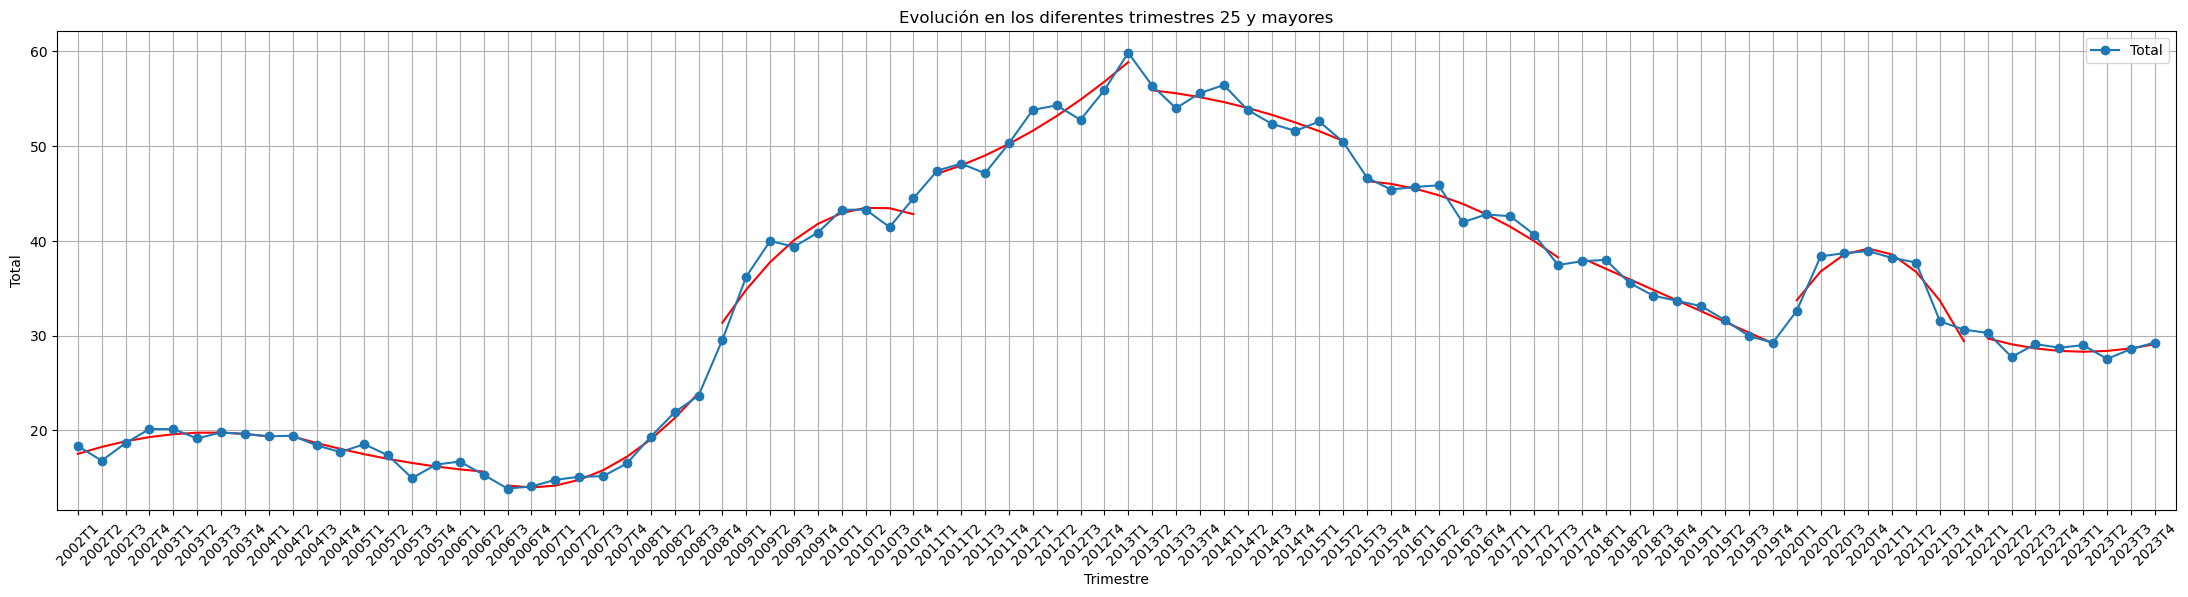

In [100]:
df_query_hombres_jovenes = df_paro_edad_sexo_ca.query('`Sexo` == "Hombres" & `Comunidades y Ciudades Autónomas` == "Total Nacional" & `Edad` == "Menores de 25 años"')
df_query_hombres_jovenes = df_query_hombres_jovenes.sort_values(by='Periodo', ascending=True)

plt.figure(figsize=(22, 6))  # Tamaño del gráfico
plt.xlabel('Trimestre')  # Etiqueta del eje X
plt.ylabel('Total')  # Etiqueta del eje Y
plt.title('Evolución en los diferentes trimestres 25 y mayores')  # Título del gráfico
plt.xticks(rotation=45)  # Rotar etiquetas del eje X para mejor visualización
plt.grid(True)  # Mostrar cuadrícula
plt.margins(x=0.01)
plt.tight_layout()  # Ajustar diseño

tramos_hombres_jovenes = np.array_split(df_query_hombres_jovenes, 10)  # Dividir los datos en tramos

# Iterar sobre cada tramo
for tramo in tramos_hombres_jovenes:
    # Calcular y trazar la línea de tendencia para cada tramo
    z = np.polyfit(tramo.index, tramo['Total3'], 2)  # Ajuste polinómico de grado 2
    p = np.poly1d(z)
    plt.plot(tramo['Periodo'], p(tramo.index), color='red')  # Especificar el color rojo

# Agregar los puntos originales al gráfico
plt.plot(df_query_hombres_jovenes['Periodo'], df_query_hombres_jovenes['Total3'], marker='o', label='Total')  # Crear la línea del gráfico

plt.legend()
plt.show()  # Mostrar gráfico

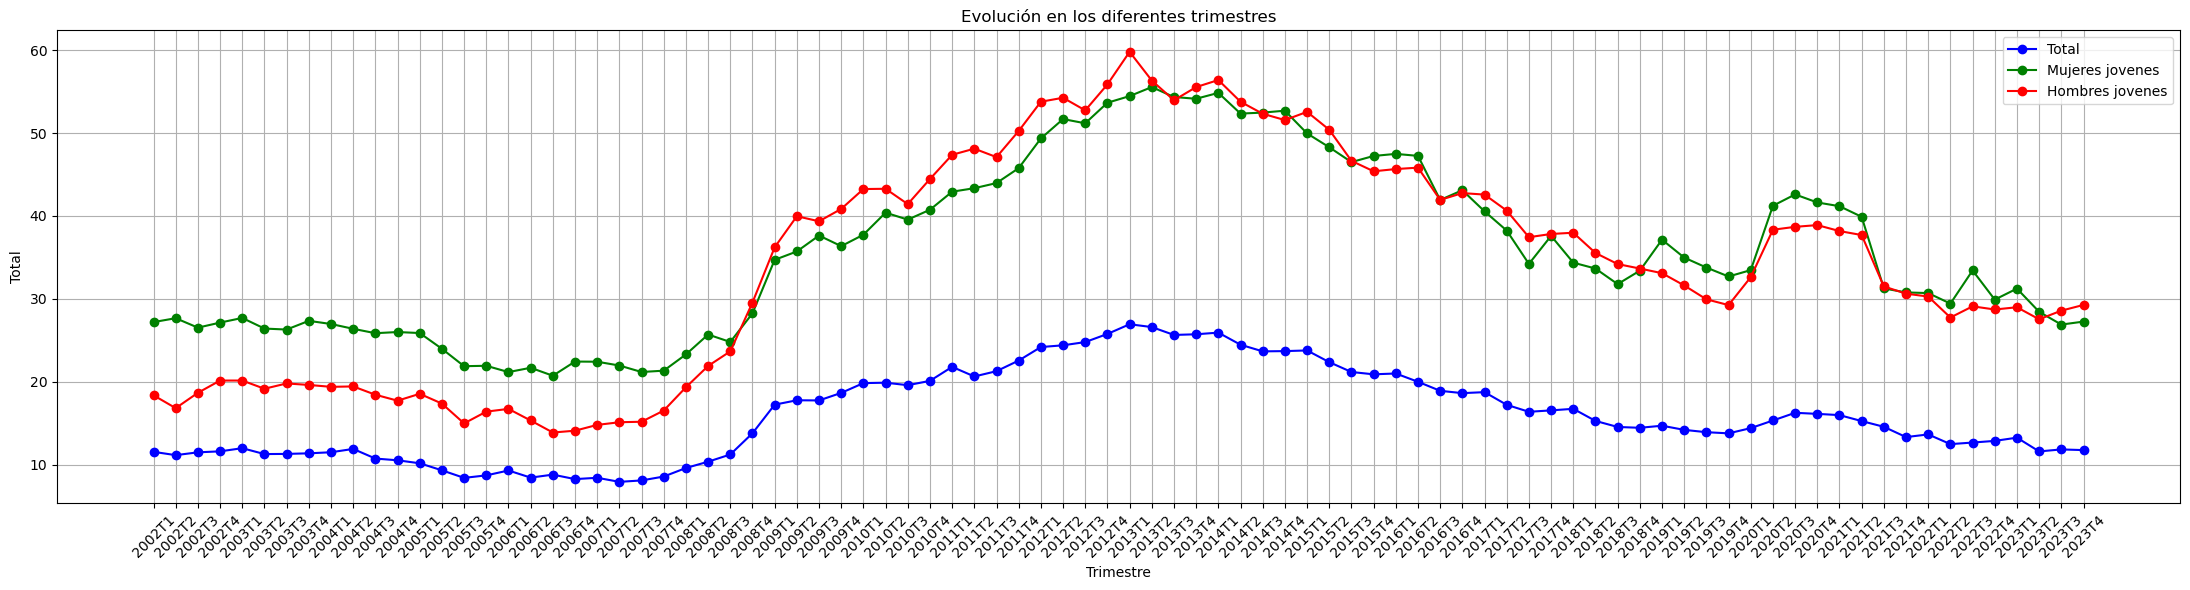

In [101]:
plt.figure(figsize=(22, 6))  # Tamaño del gráfico

# Gráfico para 'Total'
plt.plot(df_query['Periodo'], df_query['Total3'], marker='o', label='Total', color='blue')

# Gráfico para 'Menores de 25 años'
plt.plot(df_query_mujeres_jovenes['Periodo'], df_query_mujeres_jovenes['Total3'], marker='o', label='Mujeres jovenes', color='green')

# Gráfico para '25 y más años'
plt.plot(df_query_hombres_jovenes['Periodo'], df_query_hombres_jovenes['Total3'], marker='o', label='Hombres jovenes', color='red')

plt.xlabel('Trimestre')  # Etiqueta del eje X
plt.ylabel('Total')  # Etiqueta del eje Y
plt.title('Evolución en los diferentes trimestres')  # Título del gráfico
plt.xticks(rotation=45)  # Rotar etiquetas del eje X para mejor visualización
plt.legend()  # Mostrar leyenda
plt.grid(True)  # Mostrar cuadrícula
plt.tight_layout()  # Ajustar diseño
plt.show()  # Mostrar gráfico

Como puede observarse en la grafica, a pesar de que inicialmente si que hubo una clara brecha entre ambos, tras la crisis y su recuperacion, ambos grupos mantienen unas tasas muy similares (podria ser en parte por la gran tasa de paro que sufren ambos grupos)

Por esto mismo se concluye que sí, se mantiene esa brecha que existía hace 20 años pero que ha disminuido en parte, haciendo que la diferencia entre ambos no sea tan notoria como antes. Podria ser un buen enfoque intentar predecir si está diferencia entre ambos grupos crecerá, se verá incrementada o si se mantendrá, pero de momento se ve fuera del alcance de este analisis.

Por otra parte, para los jovenes, la diferencia entre ambos grupos no ha sido algo a destacar. Ambos grupos tienen unas tasas similares y en ocasiones llegan a cambiar la posicion del grupo con mayor tasa con relativa facilidad. En el caso de los jovenes no parece tener un inpacto muy relevante el sexo de la persona para pertenecer o no al grupo empleado.

# Planteamiento ultima hipotesis

## ¿Existe mucha desigualdad en cuanto a gente que esta en paro en las comunidades autonomas? ¿Existe alguna zona con mas paro? ¿Por algun motivo en concreto? 

In [102]:
df_paro_edad_sexo_ca = pd.read_csv("./data/Tasas de paro por distintos grupos de edad, sexo y comunidad autónoma limpios y organizados.csv")

<Axes: >

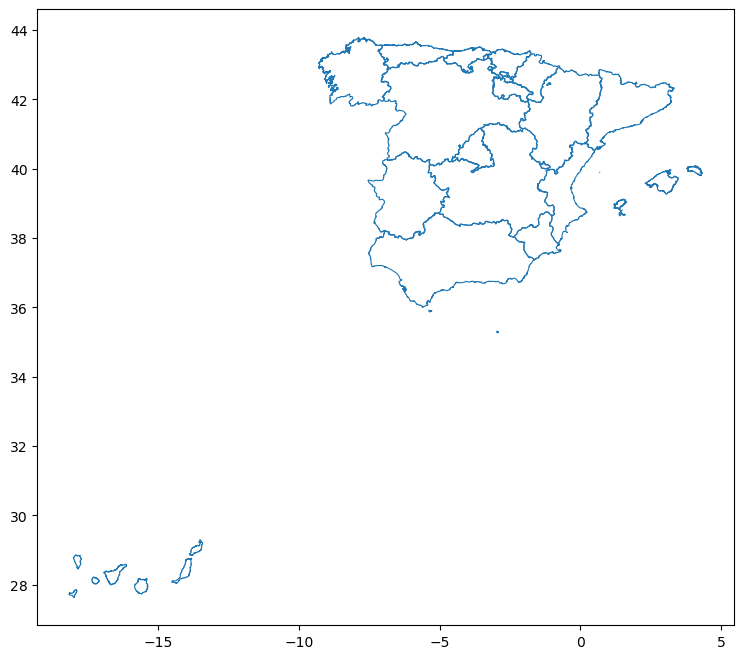

In [103]:
mapa_espana = gpd.read_file("./data/SHP/comunidades_autonomas_etrs89_30n.shp")
mapa_espana.boundary.plot(figsize=(10, 8), linewidth=0.8)

Se realiza una consulta para seleccionar los datos específicos relacionados con el desempleo por edad, sexo y comunidad autónoma en España.
Se definen los periodos de interés y se procesan los datos para cada periodo.
La función `generar_datos` toma un DataFrame y una lista de periodos como entrada, y devuelve un diccionario con los datos procesados para cada periodo.
Y se realiza una pequeña visualizacion de lo que se tiene

In [104]:
df_query_ca = df_paro_edad_sexo_ca.query('`Sexo` == "Ambos sexos" & `Comunidades y Ciudades Autónomas` != "Total Nacional" & `Edad` == "Menores de 25 años"')

periodos = ["2002T3", "2015T3"]

def generar_datos(df, periodos):
    # Renombrar las columnas
    df.columns = ["Unnamed: 0","Sexo", "Comunidad", "Edad", "Periodo", "Total", "Total2", "Total3"]

    # Inicializar el diccionario de datos
    datos = {}

    # Iterar sobre los periodos
    for periodo in periodos:
        # Filtrar el DataFrame por el periodo actual
        df_periodo = df[df["Periodo"] == periodo]

        # Crear un diccionario para almacenar los valores por comunidad en este periodo
        valores_comunidad = {}

        # Iterar sobre las filas del DataFrame del periodo actual
        for row in df_periodo.itertuples(index=False):
            # Obtener el nombre de la comunidad y el valor correspondiente en Total3
            comunidad = row.Comunidad
            valor = row.Total3

            # Agregar el valor al diccionario de valores de la comunidad
            valores_comunidad[comunidad] = valor

        # Agregar el diccionario de valores de la comunidad al diccionario de datos para este periodo
        datos[periodo] = valores_comunidad

    return datos
'''
periodos = [
    "2002T1", "2002T2", "2002T3", "2002T4",
    "2003T1", "2003T2", "2003T3", "2003T4",
    "2004T1", "2004T2", "2004T3", "2004T4",
    "2005T1", "2005T2", "2005T3", "2005T4",
    "2006T1", "2006T2", "2006T3", "2006T4",
    "2007T1", "2007T2", "2007T3", "2007T4",
    "2008T1", "2008T2", "2008T3", "2008T4",
    "2009T1", "2009T2", "2009T3", "2009T4",
    "2010T1", "2010T2", "2010T3", "2010T4",
    "2011T1", "2011T2", "2011T3", "2011T4",
    "2012T1", "2012T2", "2012T3", "2012T4",
    "2013T1", "2013T2", "2013T3", "2013T4",
    "2014T1", "2014T2", "2014T3", "2014T4",
    "2015T1", "2015T2", "2015T3", "2015T4",
    "2016T1", "2016T2", "2016T3", "2016T4",
    "2017T1", "2017T2", "2017T3", "2017T4",
    "2018T1", "2018T2", "2018T3", "2018T4",
    "2019T1", "2019T2", "2019T3", "2019T4",
    "2020T1", "2020T2", "2020T3", "2020T4",
    "2021T1", "2021T2", "2021T3", "2021T4",
    "2022T1", "2022T2", "2022T3", "2022T4",
    "2023T1", "2023T2", "2023T3", "2023T4"
]
'''


def imprimir_datos(datos):
    for periodo, valores_comunidad in datos.items():
        print(f"Periodo: {periodo}")
        for comunidad, valor in valores_comunidad.items():
            print(f"  {comunidad}: {valor}")
        print()

datos=generar_datos(df_query_ca, periodos)

imprimir_datos(datos)

Periodo: 2002T3
  Andalucía: 32.38
  Aragón: 13.5
  Asturias: 24.27
  Illes Balears: 12.3
  Canarias: 20.15
  Cantabria: 25.74
  Castilla y León: 23.19
  Castilla - La Mancha: 16.53
  Catalunya: 20.5
  Comunitat Valenciana: 19.92
  Extremadura: 31.75
  Galicia: 21.34
  Madrid: 15.54
  Murcia: 20.26
  Nafarroa: 12.32
  Euskadi: 24.99
  La Rioja: 14.6
  Ceuta: 20.35
  Melilla: 0.0

Periodo: 2015T3
  Andalucía: 57.15
  Aragón: 39.51
  Asturias: 34.17
  Illes Balears: 31.86
  Canarias: 52.33
  Cantabria: 33.68
  Castilla y León: 44.65
  Castilla - La Mancha: 52.77
  Catalunya: 40.66
  Comunitat Valenciana: 44.19
  Extremadura: 59.45
  Galicia: 40.43
  Madrid: 44.32
  Murcia: 49.39
  Nafarroa: 35.43
  Euskadi: 40.59
  La Rioja: 36.75
  Ceuta: 90.35
  Melilla: 67.14



Por cada uno de los periodos que se seleccionen o se hayan seleccionado anteriormente, se genera un mapa que ayuda a visualizar de forma sencilla y clara como es el estado de las diferentes tasas de paro en España dependiendo de la CCAA. Si que es verdad que las Ciudades autonomas no se llegan a distinguir mucho cuan rojo o no estan por lo que se procede a realizar un grafico que ayuda a ver su estado concreto y a entender su situacion.

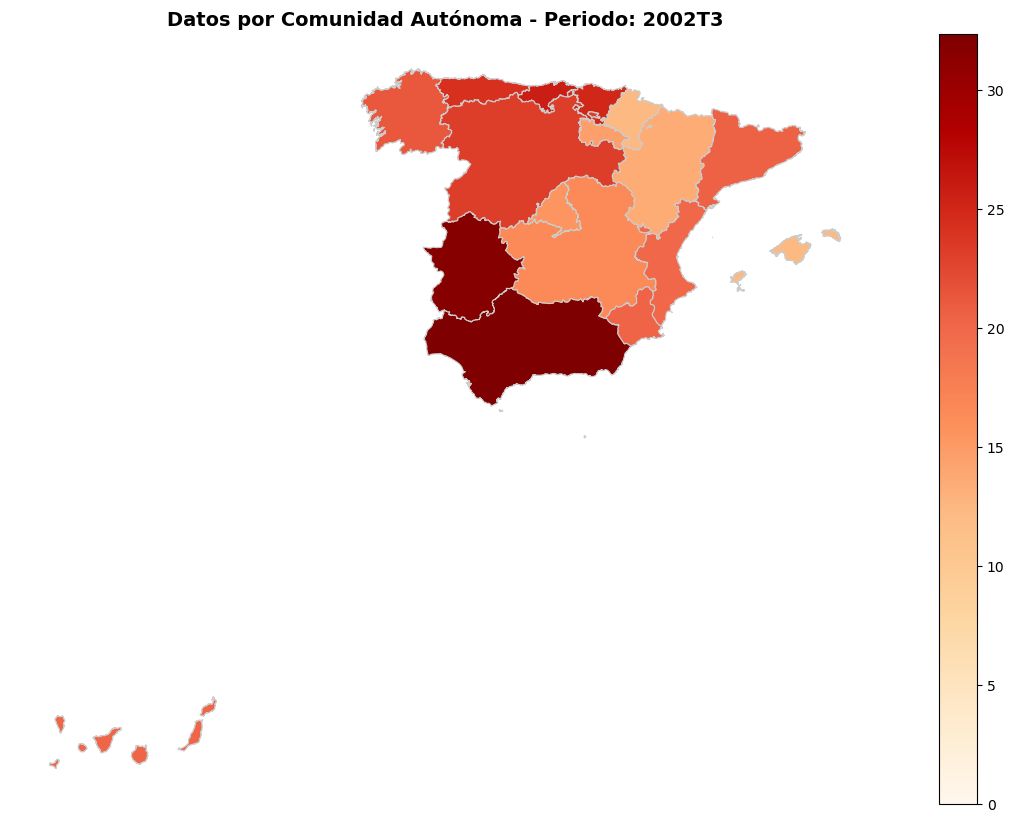

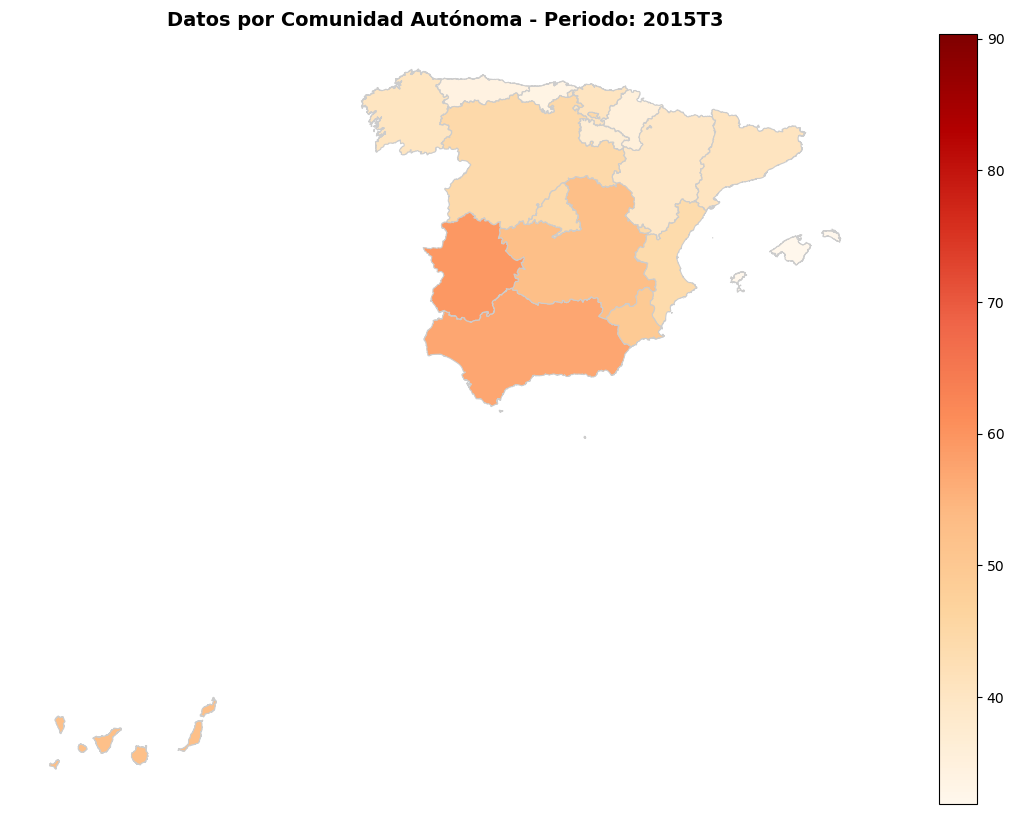

In [105]:
for periodo, valores_comunidad in datos.items():
    # Asignar los datos a las comunidades autónomas en el DataFrame del mapa
    mapa_espana["Datos"] = mapa_espana["texto_alt"].map(valores_comunidad)

    # Crear el mapa
    fig, ax = plt.subplots(1, 1, figsize=(15, 10))

    mapa_espana.plot(column="Datos", cmap="OrRd", linewidth=0.8, ax=ax, edgecolor="0.8", legend=True)

    # Añadir título y etiquetas
    ax.set_title(f"Datos por Comunidad Autónoma - Periodo: {periodo}", fontdict={"fontsize": "14", "fontweight": "bold"})
    plt.axis('off')
    # Mostrar el mapa
    plt.show()

Lo que se ha considerado interesante es saber como se presentaba la tasa de paro en la nacion cuando se alcanzó el maximo en alguna de las comunidades autonomas y cuando tambien se alcanzo el minimo, por lo que primero se ha obtenido el periodo en el que en alguna de las comunidades autonomas se cumplen estas condiciones.

In [106]:
def encontrar_periodo_extremo(df):
    # Encuentra el índice del valor máximo y mínimo en la columna "Total3"
    indice_maximo = df["Total3"].idxmax()
    indice_minimo = df["Total3"].idxmin()
    
    # Obtiene los periodos correspondientes a los índices máximos y mínimos
    periodo_maximo = df.loc[indice_maximo, "Periodo"]
    periodo_minimo = df.loc[indice_minimo, "Periodo"]
    
    # Devuelve los periodos máximo y mínimo
    return periodo_maximo, periodo_minimo

# Utiliza la función para encontrar el periodo con el valor máximo y mínimo
periodo_maximo, periodo_minimo = encontrar_periodo_extremo(df_query_ca)
print("Periodo con el valor máximo:", periodo_maximo)
print("Periodo con el valor mínimo:", periodo_minimo)

Periodo con el valor máximo: 2015T3
Periodo con el valor mínimo: 2002T3


Una vez obtenido el valor, se generan los dos mapas para ver cual era el estado del mapa y como se diferencian las diferentes CCAA en cuanto a su tasa se refiere. De forma adicional se genera una tabla como ayuda

In [107]:
def graficar_tasa_por_comunidad(df, periodo):
    # Filtrar el DataFrame para obtener los datos del periodo específico
    df_periodo = df[df["Periodo"] == periodo]
    
    # Obtener los nombres de las comunidades autónomas y sus tasas de desempleo
    comunidades = df_periodo["Comunidad"]
    tasas = df_periodo["Total3"]
    
    # Ordenar los datos de mayor a menor tasa de desempleo
    comunidades, tasas = zip(*sorted(zip(comunidades, tasas), key=lambda x: x[1], reverse=True))
    
    # Crear la gráfica de barras
    plt.figure(figsize=(12, 6))
    plt.bar(comunidades, tasas, color='skyblue')
    
    # Añadir etiquetas y título
    plt.xlabel('Comunidad Autónoma')
    plt.ylabel('Tasa de Desempleo')
    plt.title(f'Tasa de Desempleo por Comunidad Autónoma - Periodo {periodo}')
    
    # Rotar las etiquetas del eje x para mejor legibilidad
    plt.xticks(rotation=90)
    
    # Mostrar la gráfica
    plt.tight_layout()
    plt.show()

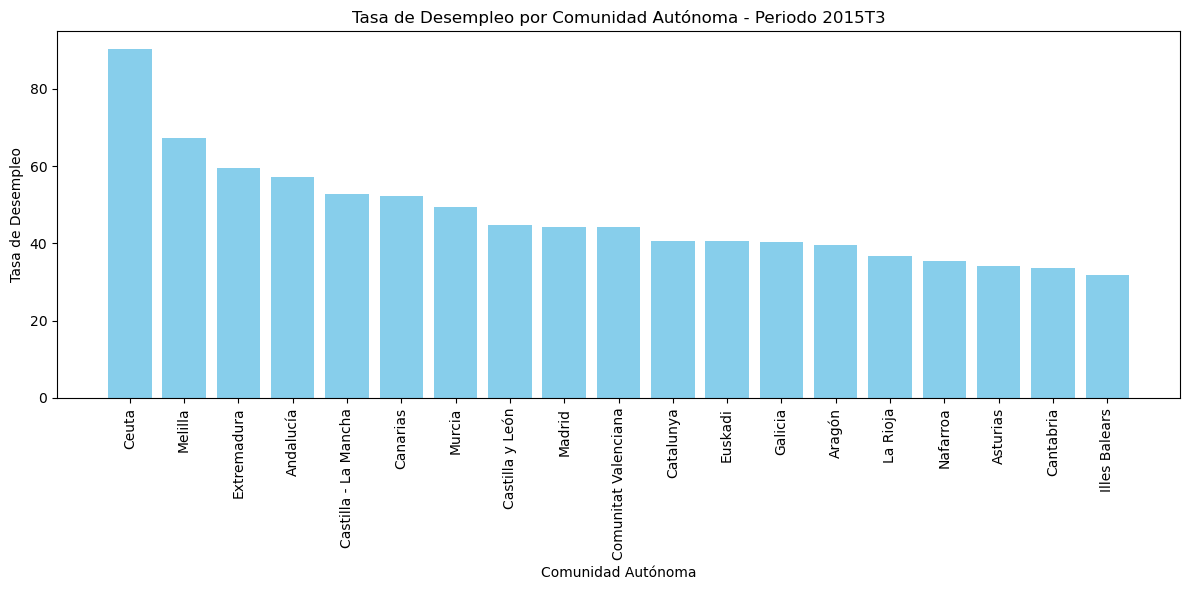

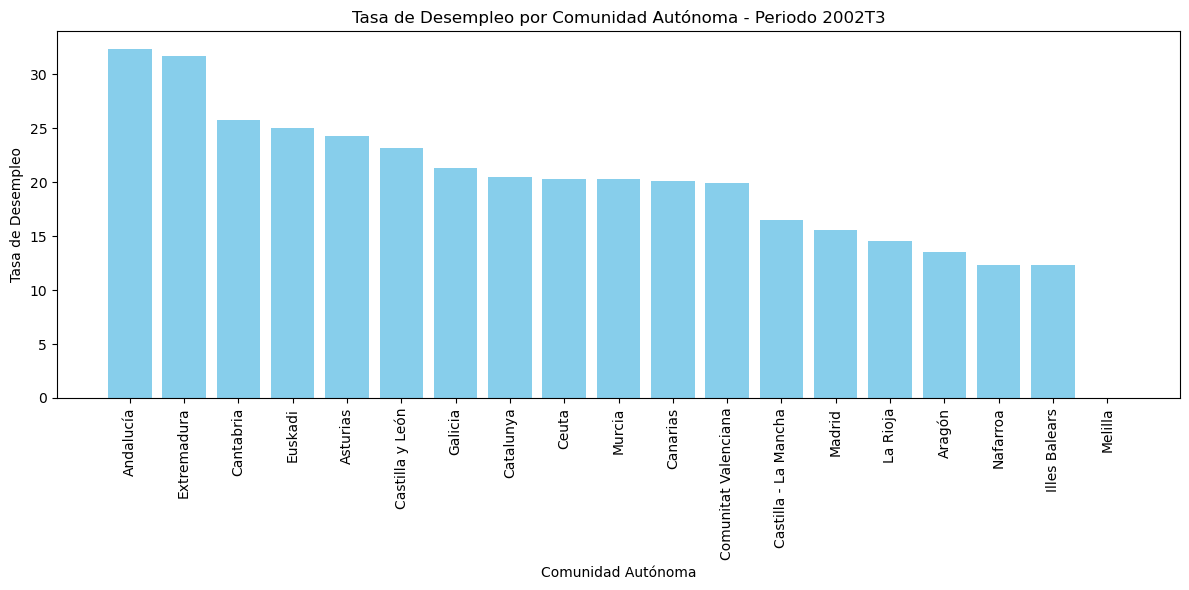

In [108]:
periodo_deseado = "2015T3"  
graficar_tasa_por_comunidad(df_query_ca, periodo_deseado)
periodo_deseado = "2002T3"  
graficar_tasa_por_comunidad(df_query_ca, periodo_deseado)

Aprovechando que se ha obtenido ya la informacion sobre la influencia de la edad y de la CCAA para determinar si tiene alguna relacion con la idea de tener una tasa de paro mas o menos baja, se decide ver la relacion entre la tasa de paro nacional con las dos variables categoricas que se han estudiado principalmente en este analisis, siendo estas la CCAA y la edad.
Puede notarse que en algunos casos se hace mas que claro que la edad y la CCAA influyen en esta tasa y que el cumplirse ambas condiciones repercute notoriamente en esta tasa que se ha venido estudiando.

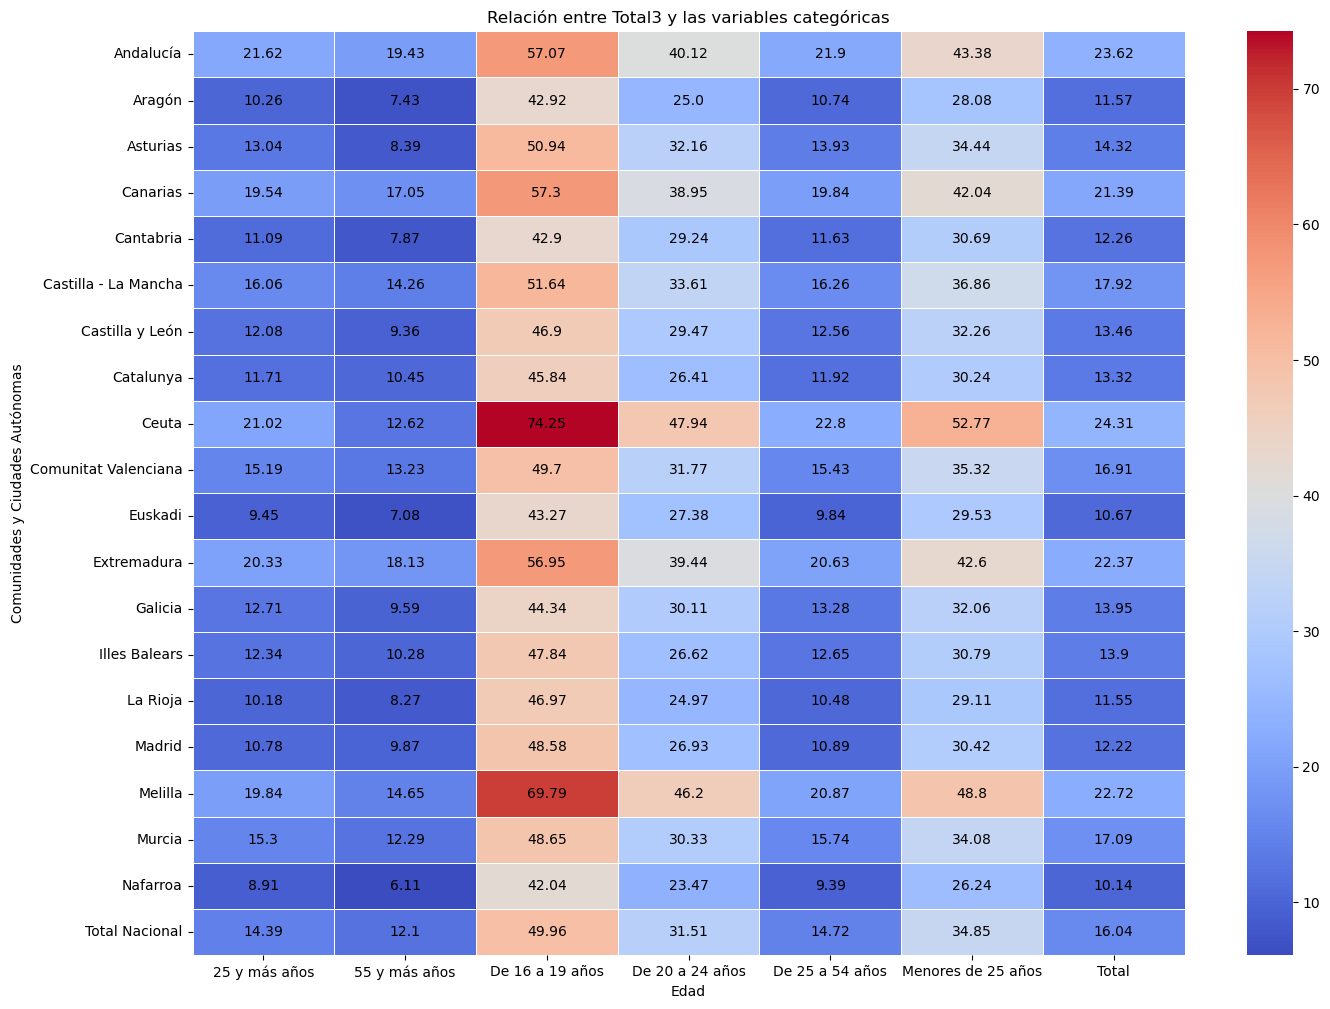

In [109]:
plt.figure(figsize=(16, 12))

# Crear el heatmap sin mostrar los números en las celdas
heatmap = sns.heatmap(df_paro_edad_sexo_ca.pivot_table(index='Comunidades y Ciudades Autónomas', columns='Edad', values='Total3'),
                      annot=False, cmap='coolwarm', linewidths=.5)

# Añadir los números como anotaciones fuera de las celdas
for i in range(len(df_paro_edad_sexo_ca['Comunidades y Ciudades Autónomas'].unique())):
    for j in range(len(df_paro_edad_sexo_ca['Edad'].unique())):
        plt.text(j + 0.5, i + 0.5, round(df_paro_edad_sexo_ca.pivot_table(index='Comunidades y Ciudades Autónomas', columns='Edad', values='Total3').values[i, j], 2),
                 ha='center', va='center', color='black')

# Ajustar el título y las etiquetas de los ejes
plt.title('Relación entre Total3 y las variables categóricas')
plt.xlabel('Edad')
plt.ylabel('Comunidades y Ciudades Autónomas')

# Mostrar el heatmap
plt.show()

Con los resultados obtenidos, puede verse que la zona del pais del que se trate afecta a esta tasa del paro, estando algunas zonas especialmente afectadas. En estos casos sería conveniente revisar cuales son los motivos de esto, a que se debe o si tiene alguna relacion con su economia local. Tras revisar los mapas si que se puede comprobar que la zona norte tiene indices de paro mas reducidos, mientras que, por lo general, el sur suele verse mas afectado por esto.

Podría deberse a su tipo de economia, muchas veces enfocada al turismo, o bien a otros muchos factores tanto internos como externos. Podria ser tambien un buen punto de estudio para continuar el actual.